# The Sparks Foundation : Graduate Rotational Internship Program (GRIP) - Data Science & Business Analytics 

### Author : Abhishek Meena

### Task 1 : Prediction using Supervised Machine Learning

    Problem Statement - 
    ◙ Predict percentage of a student based on the number of study hours. 
    ◙ What will be the predicted score if a student studies for 9.25 hrs./day?
    
    Solution -
    Here we are using Simple Linear Regression algorithm as the data consists of just 2 variables, one is dependent (Y) and other is independent (X) variable. 

    Steps followed to predict the outcome -
    ◙ Step 1 - Importing the required libraries  
    ◙ Step 2 - Importing the data set
    ◙ Step 3 - Exploring and understanding the data  
    ◙ Step 4 - Fitting the Linear Regression model by OLS method
    ◙ Step 5 - Plotting Best fit line 
    ◙ Step 6 - Validating the relationship between X & Y variable 
    ◙ Step 7 - Evaluating the model 
    ◙ Step 8 - Predictions 

#### Step 1 - Importing the required laibraries 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf


#### Step 2 - Importing the data set

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


As per the problem statement we need to predict the Score for students on the basis of their study hours hence our 'X' variable here would be 'Hours' and 'Y' variable would be 'Scores' 

#### Step 3 - Exploring and understanding the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

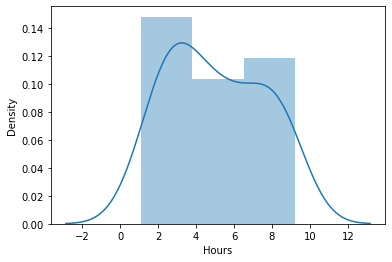

In [10]:
sns.distplot(data['Hours'])

<AxesSubplot:>

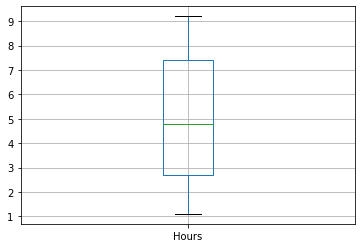

In [11]:
#Box plot 
data.boxplot(column=['Hours'])

There are no outliers in Hours column.

An outlier is an unusually large or small observation. Outliers can have a disproportionate effect on statistical results and it may have a big effect on the slope of the regression line. Hence it is necessary for us to detect and deal with the outliers in the data in case if any.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

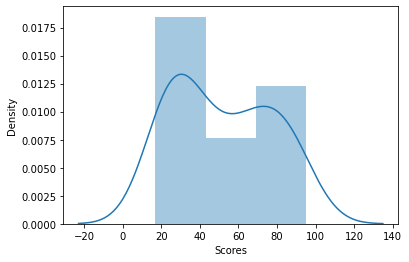

In [12]:
sns.distplot(data['Scores'])

<AxesSubplot:>

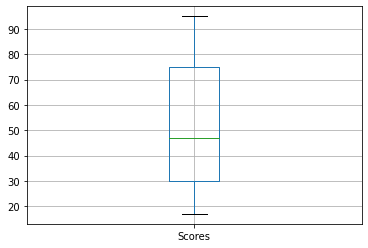

In [13]:
#Box plot 
data.boxplot(column=['Scores'])

There are no outliers in Scores column as well

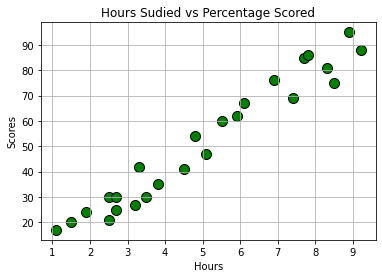

In [14]:
plt.scatter(data.Hours, data.Scores, c='green', linewidths = 1, marker =".", edgecolor ="black", s = 400)
plt.title("Hours Sudied vs Percentage Scored")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

#### Step 4 - Fitting the Linear Regression model by OLS method

In [15]:
# Here we are using Ordinary least-squares method to fit the model providing Y variable ~ X variable   
model = smf.ols("Scores~Hours",data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           9.13e-17
Time:                        17:39:06   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

#### Step 5 - Plotting Best fit line 

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

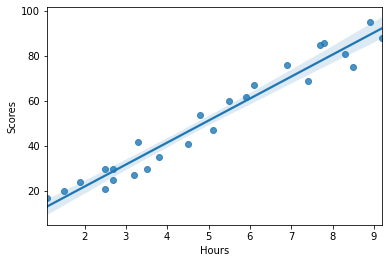

In [16]:
# Plotting the best representative line for all the data points determined by OLS (Ordinary least-squares) method above 
sns.regplot(x="Hours", y="Scores", data=data)

A line of best fit is a straight line drawn through the maximum number of points on a scatter plot balancing about an equal number of points above and below the line. It is used to study the nature of relation between two variables.

#### Step 6 - Validating the relationship betweeb X & Y variable

In [17]:
#coefficient / Model parameters 
model.params

Intercept    2.483673
Hours        9.775803
dtype: float64

As per the formula of Linear Regression ŷ = b0 + b1x here we are getting the value of b0 as an Intercept and b1 as Hours. Hence the final formula to predict Y (Scores) for any given value of x (Study hours) becomes,  ŷ = 2.483673 + 9.775803(x)

Simultaneously, the algorithm here is also checking the Hypothesis test which is as follows, 
Null Hypothesis H0 : b1 = 0 (there is no influence of X varivable on predicting ŷ)
Alternate Hypotheis Ha : b1 ≠ 0 (there is an influence of X varivable on predicting ŷ)
    
If b1 is 0 then there wouldn't be any influence of X varivable on predicting ŷ (as per the formula of Linear Regression:  ŷ = b0 + b1x) hence it is simultaneously very necessary to check the above Hypothesis Test. 

Comparing the p value with α value (0.05) we can decide if to reject null hypothesis or accept null hypothesis. 

The condition is if p value < α value : We reject null hypothesis H0 & if p value > α value : We fail to reject null hypothesis H0, means we accept H0

In [18]:
#t & p-values 
print(model.tvalues, '\n', model.pvalues)

Intercept     0.981044
Hours        21.582931
dtype: float64 
 Intercept    3.367785e-01
Hours        9.132624e-17
dtype: float64


Looking at the p value (9.132624e-17 = almost 0) above we can clearly say that p value < α value (9.132624e-17 < 0.05) and hence we can reject the null hypothesis, which means there is an influence of X varivable on predicting ŷ.

#### Step 7 - Evaluating the model 

In [19]:
#R squared values (Coefficient of determination) ranges from 0 to 1
(model.rsquared)

0.9529481969048356

Looking at the R^2 value we can say that the model is performing Very Good in predicting the Y variable

#### Step 8 - Predictions 

In [20]:
hours = pd.Series([9.25])
data_pred = pd.DataFrame(hours, columns=['Hours'])
model.predict(data_pred)

0    92.909855
dtype: float64

Looking at the prediction above we can say that the prdicted score / percentage for the student who studied for 9.25 hours is 92.90%